# Avaliação Aula 06 - Introdução Ciência de Dados

# Exercicio 1
Considere a base de dados 'vertebralcolumn-2C'. Determine o melhor valor de k no método dos k-vizinhos usando validação cruzada com k-fold=10. Use o código abaixo para preparar os dados.

```python
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/vertebralcolumn-2C.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)
```

Escolha uma:<br>
<b>a. 9</b><br>
<b>b. 5</b><br>
<b>c. 2</b><br>
<b>d. 1</b><br>
<b>e. 15</b><br>

Y:  ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'A

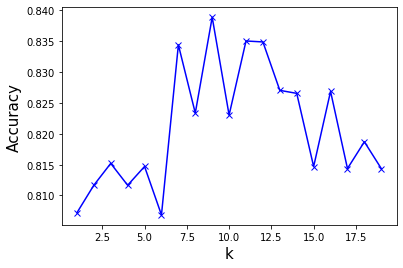

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/vertebralcolumn-2C.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
data = data.to_numpy()
nrow,ncol = data.shape

#print("data:",data)

y = data[:,-1]
X = data[:,0:ncol-1]

print("Y: ",y)
#print("X: ",X)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

nkf = 10
vscore = []
vk = []

for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    cv = cross_validate(model, x_train, y_train, cv=nkf)    
    vscore.append(cv['test_score'].mean())
    vk.append(k)

plt.plot(vk, vscore, '-bx')
plt.xlabel('k',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)

best_k = np.argmax(vscore)+1

#extra: modelando com o melhor k e achando a acuracia com os dados de teste
model = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
acuracy = model.score(x_test,y_test)

print("Resposta: ", best_k)

plt.show(True)

# Exercicio 2
Considere a base de dados 'vertebralcolumn-2C'. Calcule a acurácia na classificação usando regressão logística. Considere 20% dos dados no conjunto de teste e o método hold-out. Use o código abaixo para preparar os dados.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/vertebralcolumn-2C.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)
```
Escolha uma:<br>
<b>a. 0.9</b><br>
<b>b. 0.3</b><br>
<b>c. 0.5</b><br>
<b>d. 0.2</b><br>
<b>e. 0.1</b><br>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/vertebralcolumn-2C.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)


from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("Resposta: ", '%.1f' % model.score(x_test,y_test))

Resposta:  0.9


# Exercicio 3
Considere a base de dados 'vertebralcolumn-2C'. Calcule a acurácia na classificação usando Naive Bayes. Considere 20% dos dados no conjunto de teste e o método hold-out. Considere o código abaixo.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/vertebralcolumn-2C.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)
```

Escolha uma:<br>
<b>a. 0.2</b><br>
<b>b. 0.5</b><br>
<b>c. 1.0</b><br>
<b>d. 0.8</b><br>
<b>e. 0.1</b><br>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/vertebralcolumn-2C.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("Resposta: ", '%.1f' % model.score(x_test,y_test))

Resposta:  0.8


# Exercicio 4
Considere a base Vehicle. Realizando a classificação usando o método hold-out, selecionando 20% dos dados no conjunto de teste, qual classificador oferece o melhor resultado? Considere o código abaixo.

```python
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/Vehicle.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)
```

Escolha uma:<br>
<b>a. k-vizinhos com k = 5</b><br>
<b>b. Naive Bayes com distribuição Gaussiana (GaussianNB)</b><br>
<b>c. Naive Bayes com distribuição de Bernoulli (BernoulliNB)</b><br>
<b>d. k-vizinhos com k = 10</b><br>
<b>e. Regressão Logística</b><br>

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/Vehicle.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt

#k-vizinhos com k=5
model_knn_5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model_knn_5.fit(x_train,y_train)
y_pred = model_knn_5.predict(x_test)
acuracy_knn_5 = model_knn_5.score(x_test,y_test)

#k-vizinhos com k=10
model_knn_10 = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
model_knn_10.fit(x_train,y_train)
y_pred = model_knn_10.predict(x_test)
acuracy_knn_10 = model_knn_10.score(x_test,y_test)

#Naive Bayes com distribuição Gaussiana
model_gauNB = GaussianNB()
model_gauNB.fit(x_train,y_train)
y_pred = model_gauNB.predict(x_test)
acuracy_gauNB = model_gauNB.score(x_test,y_test)

#Naive Bayes com distribuição Bernoulli
model_berNB = BernoulliNB()
model_berNB.fit(x_train,y_train)
y_pred = model_berNB.predict(x_test)
acuracy_berNB = model_berNB.score(x_test,y_test)

#Regressão Logistica
model_regLog = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model_regLog.fit(x_train,y_train)
y_pred = model_regLog.predict(x_test)
acuracy_regLog = model_regLog.score(x_test,y_test)

dic = {"K-vizinhos com k = 5":acuracy_knn_5,
       "K-vizinhos com k = 10":acuracy_knn_10,
       "Naive Bayes com distribuição Gaussiana (GaussianNB)":acuracy_gauNB,
       "Naive Bayes com distribuição de Bernoulli (BernoulliNB)":acuracy_berNB,
       "Regressão Logística":acuracy_regLog}

maior = [key for key,value in dic.items() if(max(dic.values()) == value)]

print("Resposta: ", maior[0])

Resposta:  Regressão Logística


# Exercicio 5
Para os dados gerados com o código abaixo, qual classificador oferece a melhor acurácia?

```python
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

plt.figure(figsize=(6,4))

n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=.2)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)
```

Escolha uma:<br>
<b>a. Todos forneceram a mesma acurácia.</b><br>
<b>b. k-vizinhos com k = 10</b><br>
<b>c. Naive Bayes com distribuição de Bernoulli (BernoulliNB)</b><br>
<b>d. Naive Bayes com distribuição Gaussiana (GaussianNB)</b><br>
<b>e. Regressão Logística</b><br>

Resposta:  K-vizinhos com k = 10


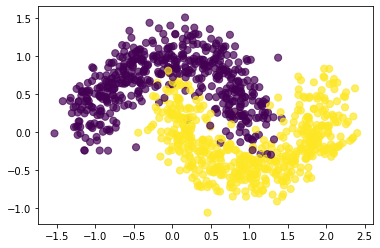

{'K-vizinhos com k = 10': 0.97, 'Naive Bayes com distribuição Gaussiana (GaussianNB)': 0.84, 'Naive Bayes com distribuição de Bernoulli (BernoulliNB)': 0.845, 'Regressão Logística': 0.84}


In [62]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

plt.figure(figsize=(6,4))

n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=.2)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

#k-vizinhos com k=10
model_knn_10 = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
model_knn_10.fit(x_train,y_train)
y_pred = model_knn_10.predict(x_test)
acuracy_knn_10 = model_knn_10.score(x_test,y_test)

#Naive Bayes com distribuição Gaussiana
model_gauNB = GaussianNB()
model_gauNB.fit(x_train,y_train)
y_pred = model_gauNB.predict(x_test)
acuracy_gauNB = model_gauNB.score(x_test,y_test)

#Naive Bayes com distribuição Bernoulli
model_berNB = BernoulliNB()
model_berNB.fit(x_train,y_train)
y_pred = model_berNB.predict(x_test)
acuracy_berNB = model_berNB.score(x_test,y_test)

#Regressão Linear
model_regLog = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model_regLog.fit(x_train,y_train)
y_pred = model_regLog.predict(x_test)
acuracy_regLog = model_regLog.score(x_test,y_test)

dic = {"K-vizinhos com k = 10":acuracy_knn_10,
       "Naive Bayes com distribuição Gaussiana (GaussianNB)":acuracy_gauNB,
       "Naive Bayes com distribuição de Bernoulli (BernoulliNB)":acuracy_berNB,
       "Regressão Logística":acuracy_regLog}

maior = [key for key,value in dic.items() if(max(dic.values()) == value)]

print("Resposta: ", maior[0])
plt.show(True)
print(dic)